In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor,     GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

ImportError: this version of pandas is incompatible with numpy < 1.17.3
your numpy version is 1.16.2.
Please upgrade numpy to >= 1.17.3 to use this pandas version

In [82]:
crop_filepath = "Crop_recommendation.csv"
data = pd.read_csv(crop_filepath)

In [83]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [84]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
N              2200 non-null int64
P              2200 non-null int64
K              2200 non-null int64
temperature    2200 non-null float64
humidity       2200 non-null float64
ph             2200 non-null float64
rainfall       2200 non-null float64
label          2200 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [86]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [87]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [88]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [89]:
data.profile_report()

AttributeError: 'DataFrame' object has no attribute 'profile_report'

# Visualization

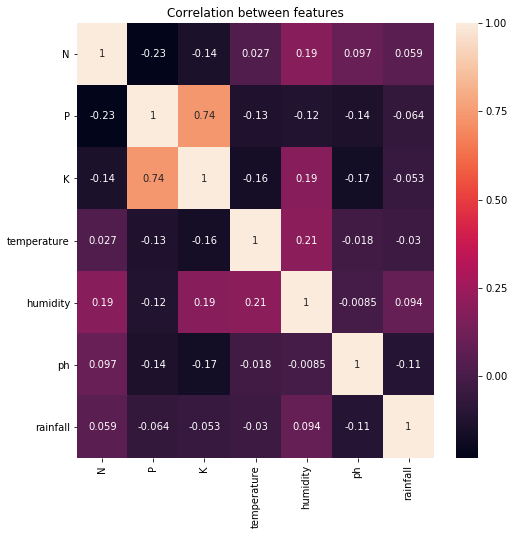

In [90]:
plt.figure(figsize=(8,8))
plt.title("Correlation between features")
corr = data.corr()
sns.heatmap(corr, annot=True)

Text(0, 0.5, 'crops')

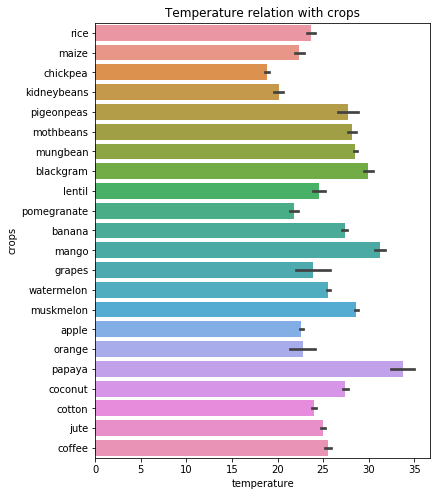

In [91]:
plt.figure(figsize=(6,8))
plt.title("Temperature relation with crops")
sns.barplot(y="label", x="temperature", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

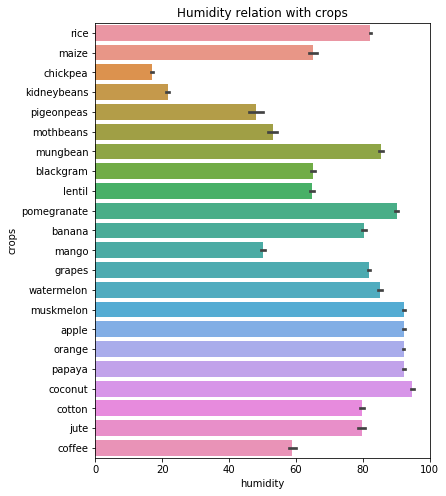

In [92]:
plt.figure(figsize=(6,8))
plt.title("Humidity relation with crops")
sns.barplot(y="label", x="humidity", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

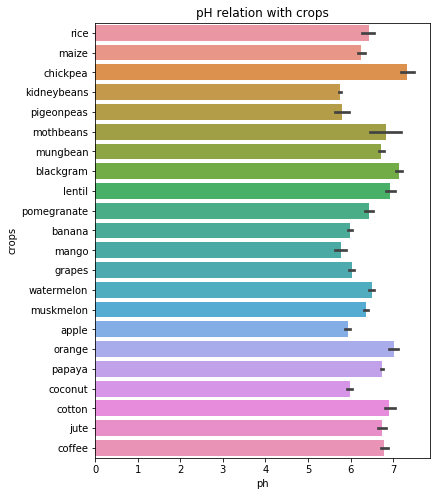

In [93]:
plt.figure(figsize=(6,8))
plt.title("pH relation with crops")
sns.barplot(y="label", x="ph", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

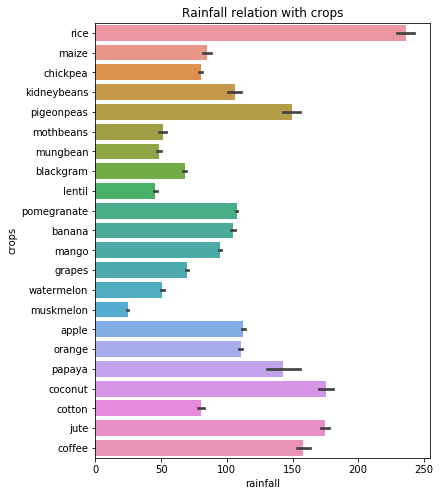

In [94]:
plt.figure(figsize=(6,8))
plt.title("Rainfall relation with crops")
sns.barplot(y="label", x="rainfall", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'Crops')

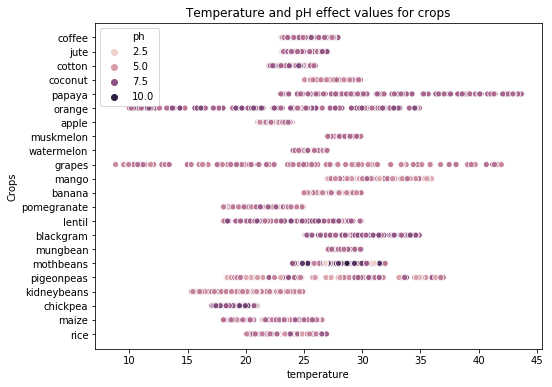

In [95]:
plt.figure(figsize=(8,6))
plt.title("Temperature and pH effect values for crops")
sns.scatterplot(data=data, x="temperature", y="label", hue="ph")
plt.ylabel("Crops")

Text(0, 0.5, 'Crops')

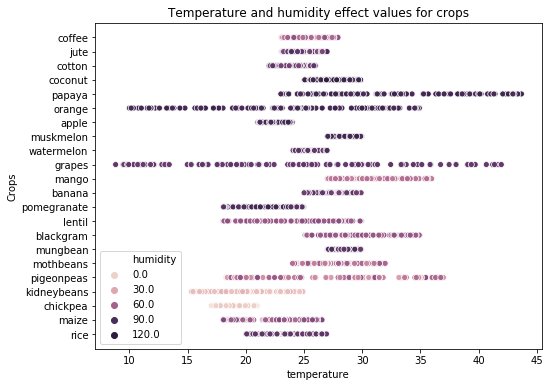

In [96]:
plt.figure(figsize=(8,6))
plt.title("Temperature and humidity effect values for crops")
sns.scatterplot(data=data, x="temperature", y="label", hue="humidity")
plt.ylabel("Crops")

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Temperature and Rainfall effect values for crops")
sns.scatterplot(data=data, x="temperature", y="label", hue="rainfall")
plt.ylabel("Crops")

Text(0, 0.5, 'Crops')

In [ ]:
data_npk = pd.melt(data, id_vars=["label"], value_vars=["N", "P", "K"],var_name='element', value_name='value')
sns.catplot(y="label", x="value", hue="element", data=data_npk)
plt.ylabel("Crop")
plt.title("Values of N, P, K in soil")

# Predictions

In [ ]:
encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)

In [ ]:
features = data.drop("label", axis=1)
target = data.label

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

## Decision Tree Classifier

In [79]:
tree = DecisionTreeClassifier(max_depth=15,random_state=0).fit(X_train, y_train)
tree_pred= tree.score(X_test, y_test)

print("Training score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test, y_test)))


Training score: 1.000
Test score: 0.987


22

## Random Forests

In [54]:
rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=0).fit(X_train, y_train)
rf_pred= rf.score(X_test, y_test)

print("Training score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test score: {:.3f}".format(rf.score(X_test, y_test)))

Training score: 1.000
Test score: 0.989


## GradientBoostingClassifier

In [55]:
gbr = GradientBoostingClassifier(n_estimators=20, max_depth=4, max_features=2, random_state=0).fit(X_train, y_train)
gbr_pred = gbr.score(X_test, y_test)

print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.999
Test score: 0.984


In [64]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [75]:
 # Get predicted probabilities
y_score1 = rf.predict_proba(X_test)[:,1]
#y_score2 = clf2.predict_proba(X_test)[:,1]

In [76]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
#false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1)) 
#print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

ValueError: multiclass format is not supported

NameError: name 'false_positive_rate1' is not defined

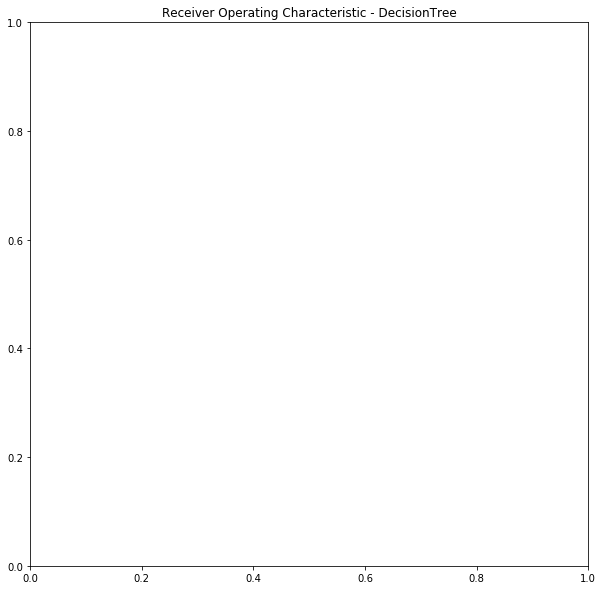

In [74]:
# Plot ROC curves
plt.subplots(1, figsize=(10,10))    
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))    
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(tree.n_classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

ValueError: Can only tuple-index with a MultiIndex